# UVP projektna naloga

## Analiza nekaterih osnovnih podatkov o avtomobilih
#### Luka Urbanč

V projektni nalogi analiziram in prikažem nekaj povezav med podatki, ki sem jih pridobil iz spletnih strani. Preden se lotimo analize, bi naprej postavil nekaj hipotez glede podatkov, ki jih bom raziskal tekom naloge: 
 - povprečna cena bo okoli 40000eur
 - največ bo motorjev s štirimi cilindri
 - hitrejši avti bodo dražji
 - najbolj pogosta prostornina bo manjša ali enaka dvem litrom
 - najbolj pogosto število prestav bo 6
 - večina avtov bo imela le predni pogon


### Pridobivanje podatkov
Naprej je potrebno pridobiti podatke s spletne strani. To storimo tako, da poženemo program `main.py` in sledimo navodilom v njemu. Ko smo to opravili se lahko lotimo naše analize podatkov.
Za začetek naložimo podatke iz ustvarjene .csv datoteke, `data.csv`, ki jo je ustvaril `main.py`. Poglejmo, kako sploh izgleda naša datoteka in katere podatke imamo na voljo. Še pred tem se splača uvoziti in definirati vse, kar potrebujemo za delo:

In [726]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import random
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.optimize import curve_fit

def ln(x, a, b):
    return a * np.log(x) + b

def sq(x, a, b, c):
    return a * x ** 2 + b * x + c

def lin(x, k, n):
    return k * x + n

def qu(x, a, b):
    return a / x + b

colors = np.array(["plum", "yellowgreen", "aquamarine", "coral", "darkturquoise", "cornflowerblue", "mediumpurple", "palevioletred", "lightpink"])
podatki_o_avtih = pd.read_csv("data.csv")
podatki_o_avtih.head()

,Id,Price (EUR),Transmission,Number of Gears,Body Type,Number of seats,Drive wheel,Fuel Type,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
0,51436,27590,5 speed manual transmission,5,"2-doors, convertible",4.0,front,gasoline,4.0,1390.0,75.0,126.0,160.0,15.6,7.1
1,51447,10389,4 speed manual transmission,4,"3-doors, hatchback",5.0,front,gasoline,4.0,1272.0,55.0,88.0,148.0,18.0,8.6
2,51467,9473,4 speed manual transmission,4,"5-doors, hatchback",5.0,front,gasoline,4.0,1272.0,55.0,88.0,148.0,18.0,8.6
3,51476,10754,4 speed manual transmission,4,"5-doors, hatchback",5.0,front,gasoline,4.0,1272.0,55.0,88.0,148.0,18.0,8.6
4,51482,11907,4 speed manual transmission,4,"5-doors, hatchback",5.0,front,gasoline,4.0,1297.0,60.0,100.0,152.0,16.8,7.4


Seveda nas najprej zanima, koliko podatkov imamo sploh na voljo. Število unikatnih avtomobilov, za katere imamo podatke je enostavno dobiti, število podatkov pa je zmnožek števila vrstic in števila stolpcev. Dolžina naše .csv datoteke je:

In [727]:
len(podatki_o_avtih.index)

4829

Skupno število podatkov pa je:

In [728]:
print(f"Skupaj imamo torej {len(podatki_o_avtih) * len(list(podatki_o_avtih.columns))} podatkov")

Skupaj imamo torej 72435 podatkov


Gotovo niso vsi popolni. Koliko od teh pa je NaN, torej manjkajčcih glede na kategorijo?

In [729]:
podatki_o_avtih.isnull().sum()

Id                                0
Price (EUR)                       0
Transmission                      0
Number of Gears                   0
Body Type                         0
Number of seats                 109
Drive wheel                       0
Fuel Type                        81
Number of Cylinders              87
Volume of engine                 94
Power                            14
Max Torque                       40
Top Speed                        62
Acceleration to 100km/h         320
Combined consumption l/100km    260
dtype: int64

Hitro lahko opazimo katere kategorije so pomanjkljive in katere ne. Ker nam NaN podatki ne koristijo, jih najprej odstranimo, zraven pa odstranimo tudi vse vrednosti 0 za ceno, saj so to očitno manjkajoči podatki. 

In [730]:
podatki_o_avtih = podatki_o_avtih.dropna()
podatki_o_avtih = podatki_o_avtih[podatki_o_avtih["Price (EUR)"] != 0]
podatki_o_avtih.isnull().sum()

Id                              0
Price (EUR)                     0
Transmission                    0
Number of Gears                 0
Body Type                       0
Number of seats                 0
Drive wheel                     0
Fuel Type                       0
Number of Cylinders             0
Volume of engine                0
Power                           0
Max Torque                      0
Top Speed                       0
Acceleration to 100km/h         0
Combined consumption l/100km    0
dtype: int64

Takšna tabela je sedaj mnogo bolj koristna, saj so vse vrstice popolne. 

## Vizualizacija podatkov iz datoteke
Preden se lotimo analize, se splača vizualizirati vse podatke, ki jih imamo na voljo, da bolje razumemo, kako so ti med sabo povezani in kakšni sploh so.
V ta namen si poglejmo grafične prikaze za podatke, njihova povprečja in največje oz. najmanjše vrednosti, kjer je to smiselno.

Začnimo s ceno avtomobilov:

Povprečna cena avtomobila je tako 40583.18, EUR


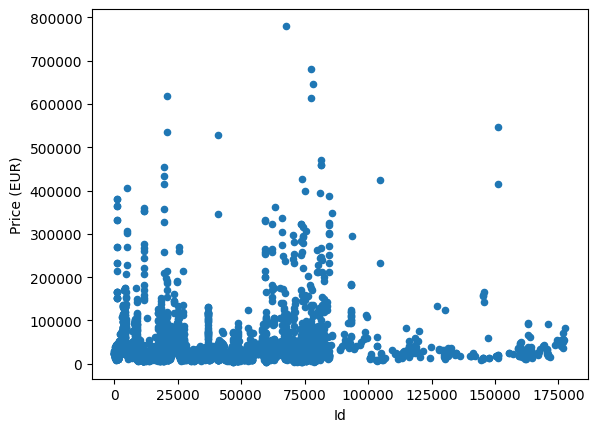

In [731]:
podatki_o_avtih.plot.scatter(x="Id", y="Price (EUR)")
print(f"Povprečna cena avtomobila je tako {round(podatki_o_avtih["Price (EUR)"].mean(), 2)}, EUR")

Narišemo še grafe za ostale smislene parametre:

<Axes: ylabel='Transmission'>

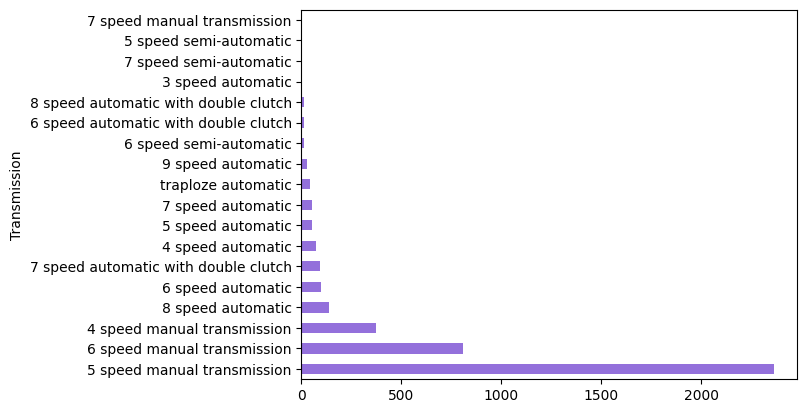

In [732]:
transmission = podatki_o_avtih["Transmission"].value_counts()
transmission.plot.barh(color="mediumpurple")

<Axes: title={'center': 'Number of gears'}>

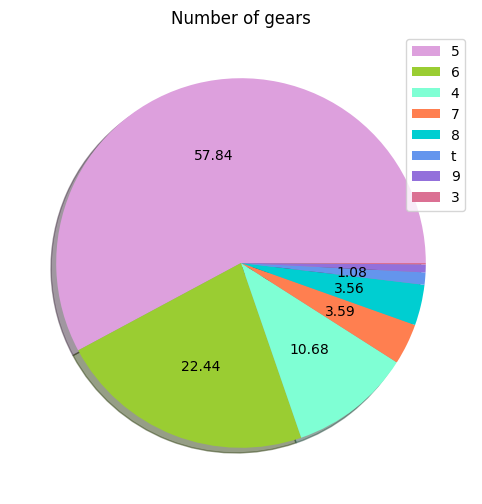

In [733]:
prestave = podatki_o_avtih["Number of Gears"].value_counts()
prestave
prestave.plot.pie(shadow=True, legend=True, title="Number of gears", ylabel="", colors=colors,  labeldistance=None, figsize=(12, 6),
                autopct=lambda p: format(p, '.2f') if p > 1 else None)

<Axes: ylabel='Body Type'>

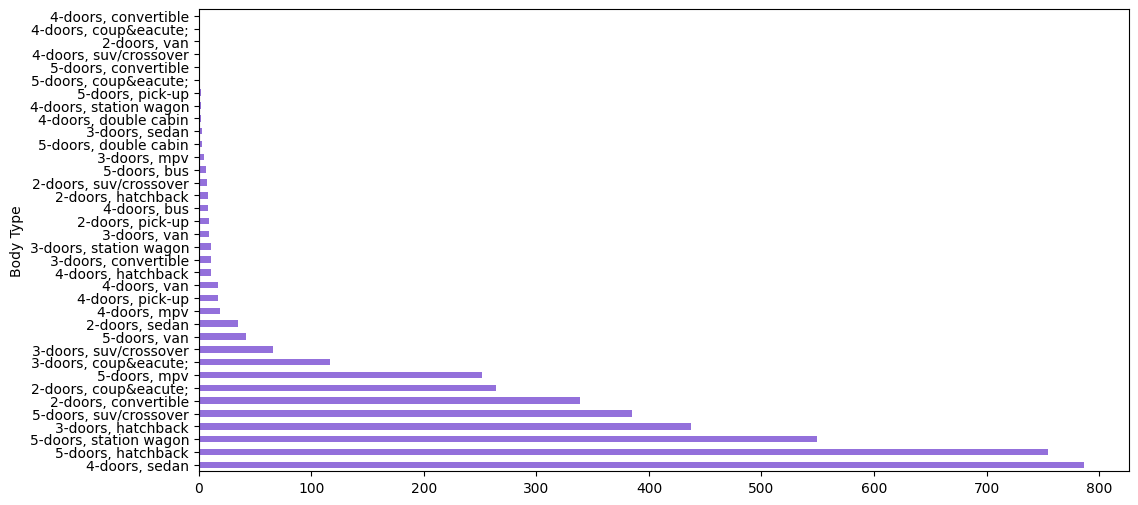

In [734]:
oblika = podatki_o_avtih["Body Type"].value_counts()
oblika.plot.barh(color="mediumpurple", figsize=(12, 6))


Opala! Opazili smo napako pri zajemu podatkov. Oblika "coup&eacute" verjetno ni pravilno izpisana, zato jo bomo zamenjali s "coupe".

<Axes: ylabel='Body Type'>

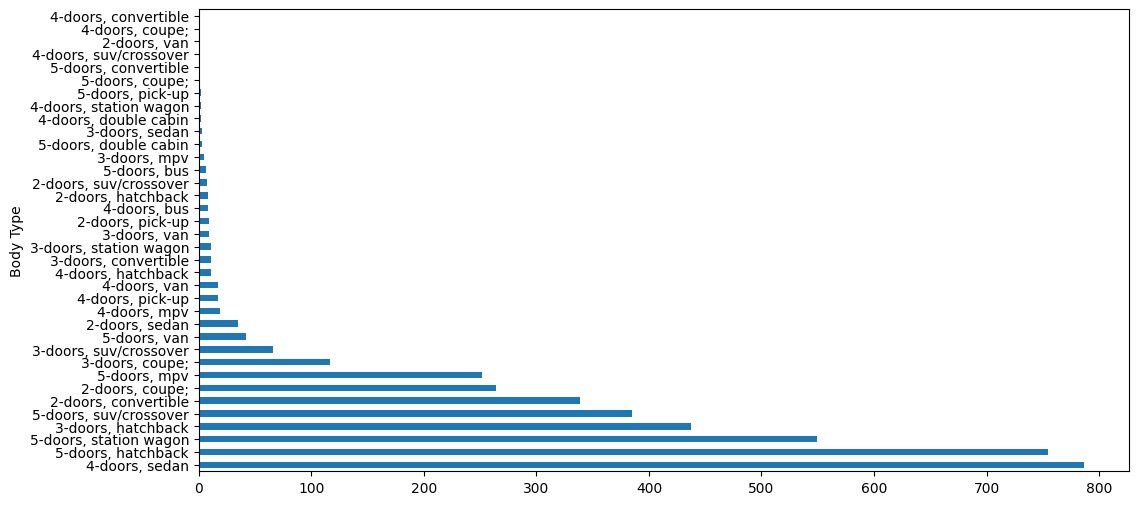

In [735]:
podatki_o_avtih["Body Type"] = podatki_o_avtih["Body Type"].str.replace("coup&eacute", "coupe")
oblika = podatki_o_avtih["Body Type"].value_counts()
oblika.plot.barh(figsize=(12, 6))

Težava uspešno odpravljena! Upamo, da je to edini lapsus v podatkih.

Average: 4.66
Max: 9.0


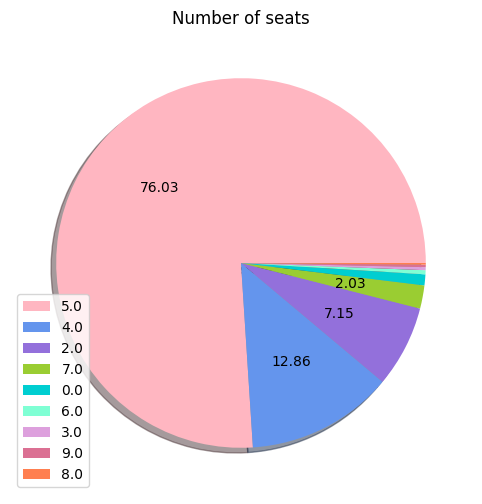

In [736]:
sedezi = podatki_o_avtih["Number of seats"].value_counts()
np.random.shuffle(colors)
sedezi.plot.pie(shadow=True, legend=True, title="Number of seats", ylabel="", colors=colors,  labeldistance=None, figsize=(12, 6),
                autopct=lambda p: format(p, '.2f') if p > 1 else None)
plt.legend(loc="lower left")
print(f"Average: {round(podatki_o_avtih["Number of seats"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Number of seats"].max()}")

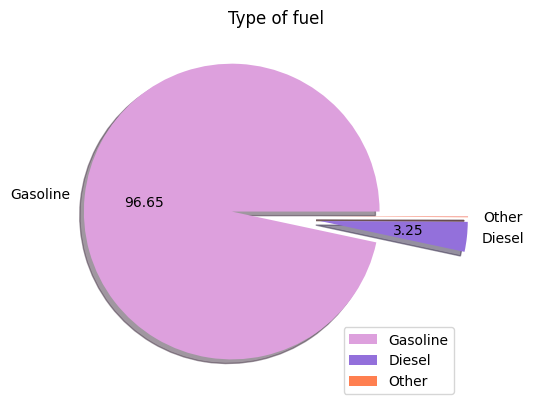

In [737]:
fuel = podatki_o_avtih["Fuel Type"].value_counts()
np.random.shuffle(colors)
fuel.plot.pie(shadow=True, explode=[0.3] * len(pd.unique(podatki_o_avtih["Fuel Type"])), 
              legend=True, title="Type of fuel", ylabel="", colors=colors,
              labels=["Gasoline", "Diesel", "Other", ""],
              autopct=lambda p: format(p, '.2f') if p > 1 else None)
plt.legend(loc="lower right")

<Axes: title={'center': 'Drive Wheel'}>

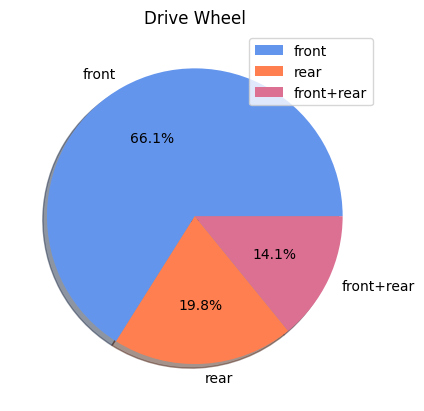

In [738]:
drive = podatki_o_avtih["Drive wheel"].value_counts()
np.random.shuffle(colors)
drive.plot.pie(shadow=True, legend=True, title="Drive Wheel", ylabel="", autopct='%1.1f%%', colors=colors)

Average: 4.48
Max: 12.0


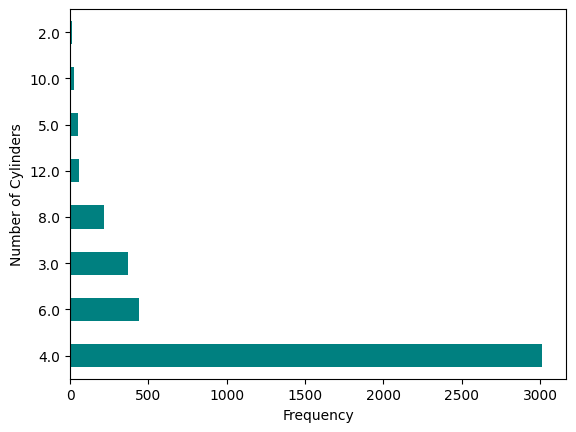

In [739]:
cyl = podatki_o_avtih["Number of Cylinders"].value_counts()
cyl.plot.barh(color="teal", xlabel="Frequency")
print(f"Average: {round(podatki_o_avtih["Number of Cylinders"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Number of Cylinders"].max()}")

Average: 1962.69
Max: 8277.0


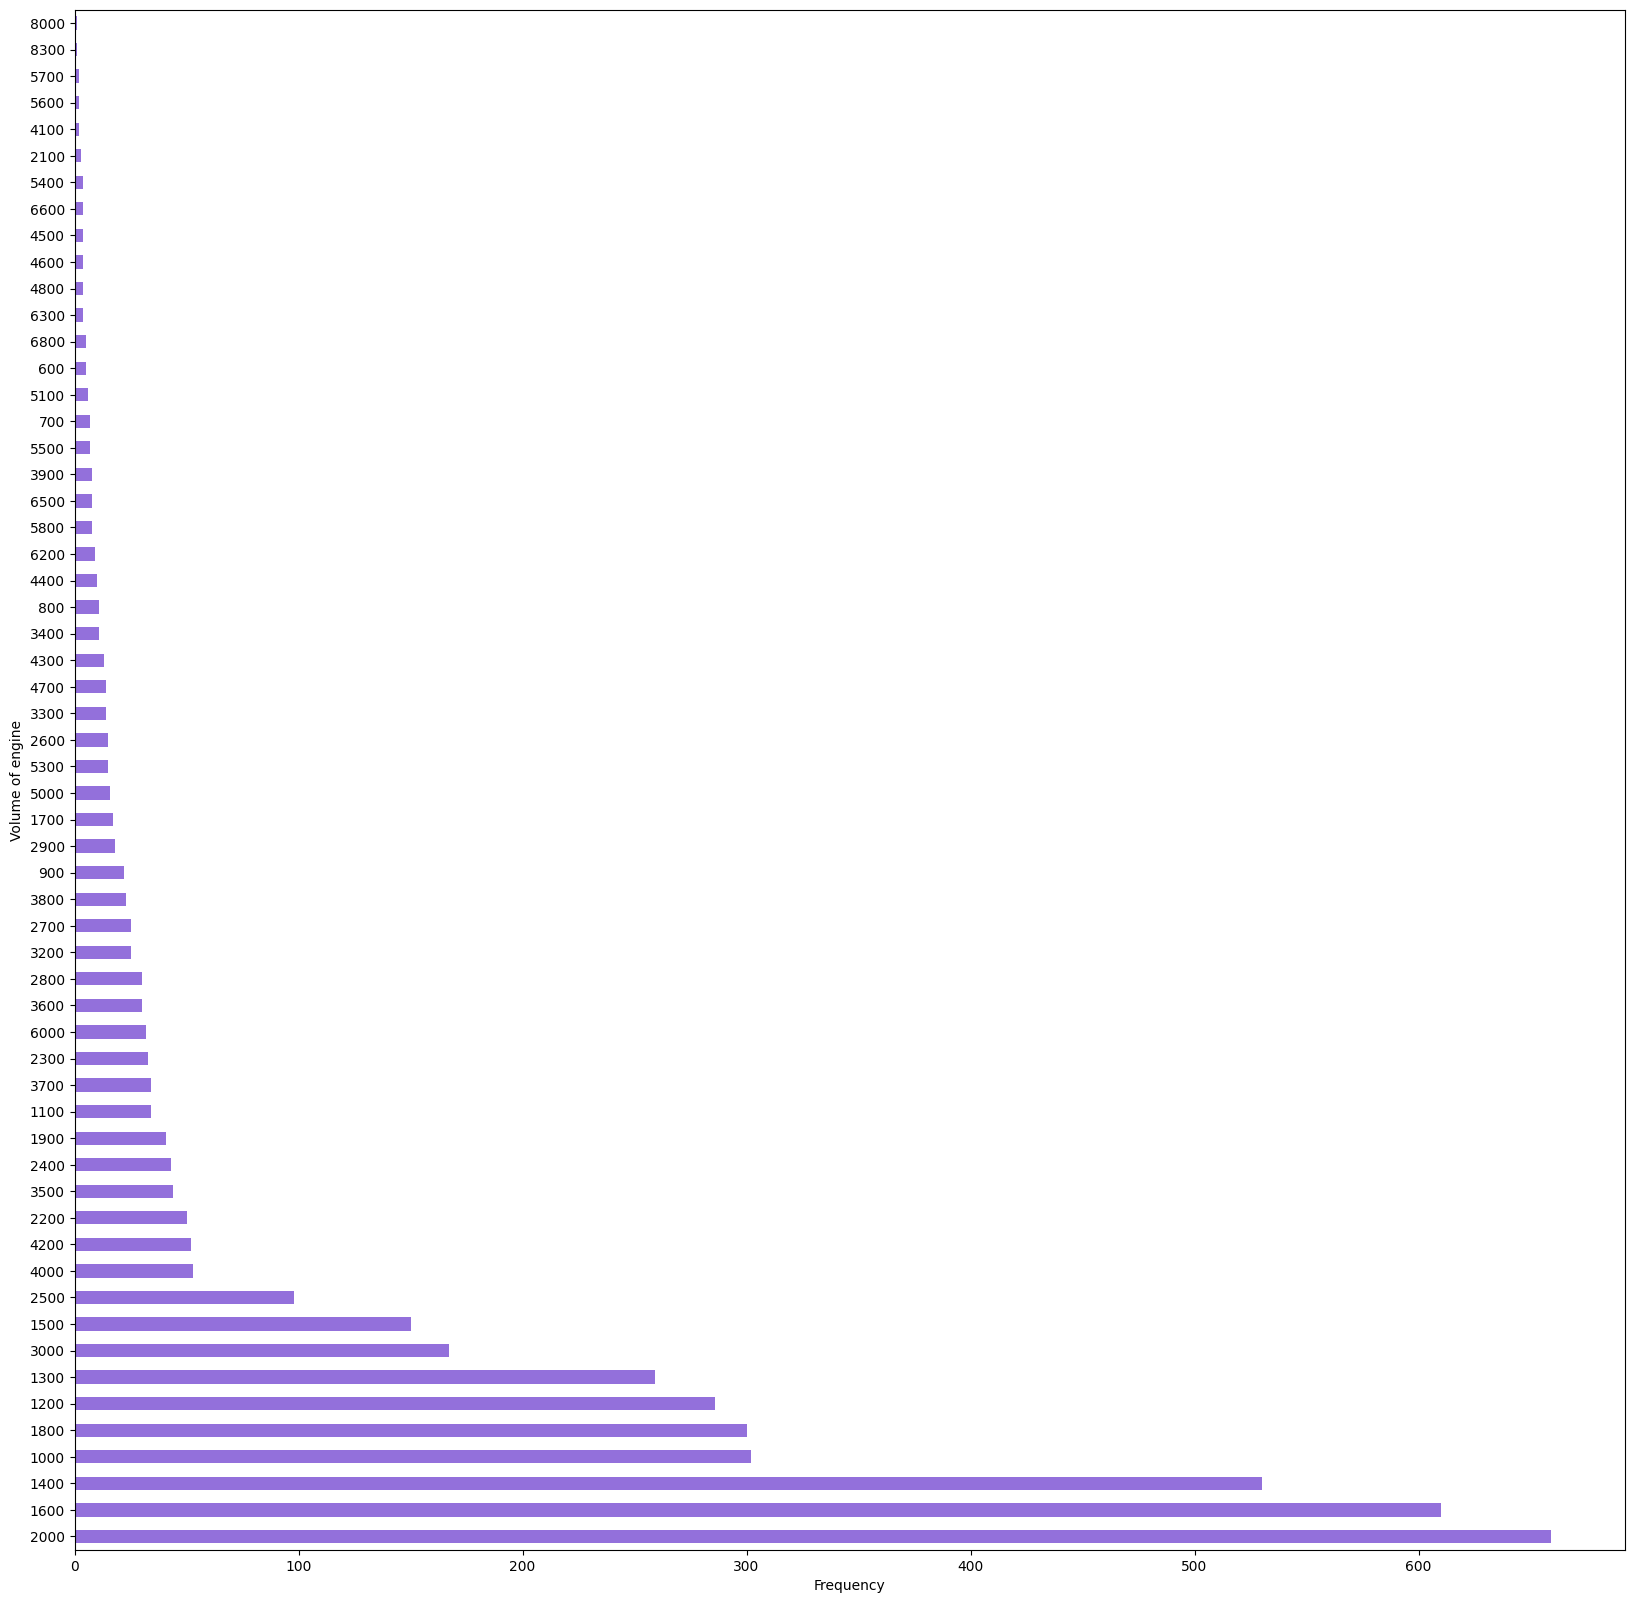

In [740]:
rounded = ((podatki_o_avtih["Volume of engine"] / 100) + 1).astype(int) *100
vol = rounded.value_counts()
np.random.shuffle(colors)
vol.plot.barh(color="mediumpurple", figsize=(20, 20),xlabel="Frequency")
print(f"Average: {round(podatki_o_avtih["Volume of engine"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Volume of engine"].max()}")

Average: 147.01
Max: 887.0


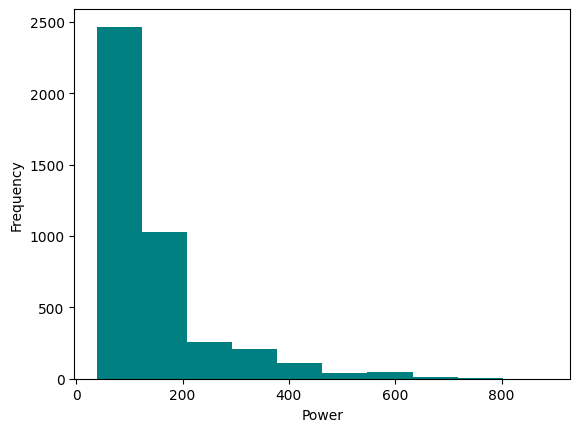

In [741]:
moc = podatki_o_avtih["Power"]
moc.plot.hist(color="teal", xlabel="Power")
print(f"Average: {round(podatki_o_avtih["Power"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Power"].max()}")

Average: 209.4
Max: 1300.0


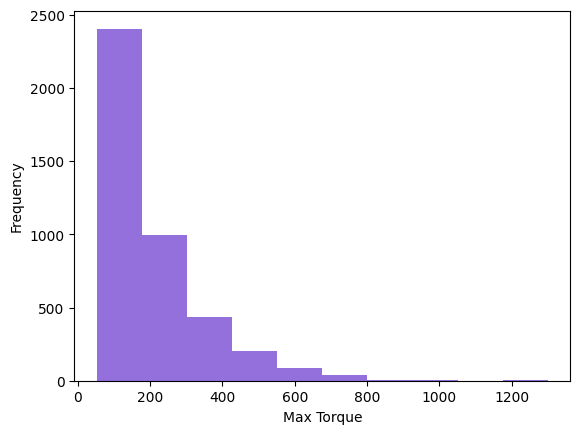

In [742]:
navor = podatki_o_avtih["Max Torque"]
navor.plot.hist(color="mediumpurple", xlabel="Max Torque")
print(f"Average: {round(podatki_o_avtih["Max Torque"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Max Torque"].max()}")

Average: 190.8
Max: 350.0


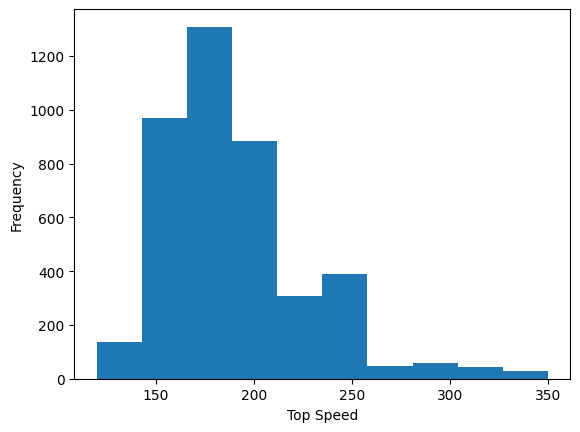

In [743]:
hitrost = podatki_o_avtih["Top Speed"]
hitrost.plot.hist(xlabel="Top Speed")
print(f"Average: {round(podatki_o_avtih["Top Speed"].mean(), 2)}")
print(f"Max: {podatki_o_avtih["Top Speed"].max()}")

Average: 11.51
Min: 2.6


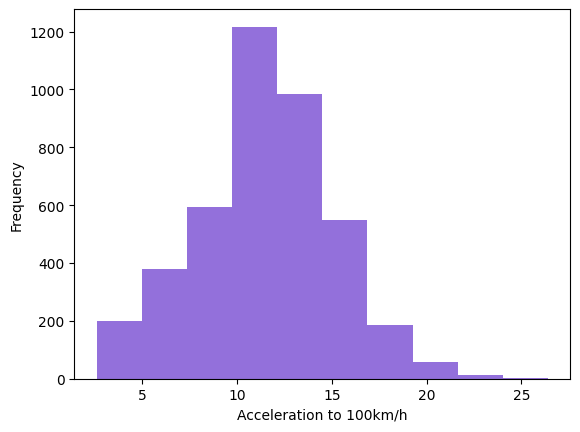

In [744]:
pospesek = podatki_o_avtih["Acceleration to 100km/h"]
pospesek.plot.hist(color="mediumpurple", xlabel="Acceleration to 100km/h")
print(f"Average: {round(podatki_o_avtih["Acceleration to 100km/h"].mean(), 2)}")
print(f"Min: {podatki_o_avtih["Acceleration to 100km/h"].min()}")

Average: 7.99
min: 0.9


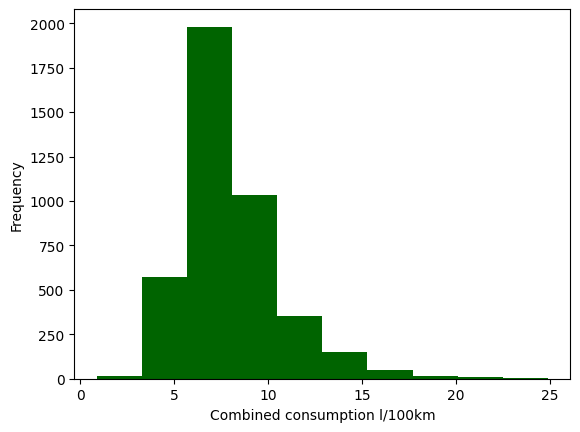

In [745]:
poraba = podatki_o_avtih["Combined consumption l/100km"]
poraba.plot.hist(color="darkgreen", xlabel="Combined consumption l/100km")
print(f"Average: {round(podatki_o_avtih["Combined consumption l/100km"].mean(), 2)}")
print(f"min: {podatki_o_avtih["Combined consumption l/100km"].min()}")

## Najbolj pogost avto
Z danimi podatki lahko sestavimo tudi "Najbolj pogost avto", tako da za njegove lastnosti vzamemo najbolj pogosto lastnost v vsaki kategoriji, pri številčnih kategorijah pa upoštevamo povprečje.

In [746]:
sez = []
for element in list(podatki_o_avtih.columns):
    try:
        var = podatki_o_avtih[element].mean()
        var = round(var, 2)
    except:
        var = podatki_o_avtih[element].value_counts().index[0]
    print(f"{element}: {var}")
    sez.append(var)

Id: 42523.43
Price (EUR): 40583.18
Transmission: 5 speed manual transmission
Number of Gears: 5
Body Type: 4-doors, sedan
Number of seats: 4.66
Drive wheel: front
Fuel Type: gasoline
Number of Cylinders: 4.48
Volume of engine: 1962.69
Power: 147.01
Max Torque: 209.4
Top Speed: 190.8
Acceleration to 100km/h: 11.51
Combined consumption l/100km: 7.99


Ali pa obstaja avto, ki bi ustrezal vsem tem zahtevam?

In [747]:
(podatki_o_avtih == sez).all(1).any()

False

Očitno ne, saj ima tudi necelo število sedežev. Toda morda pa je prav vaš avto podoben temu. Osebno vem, da se Volkswagen Golf od teh zahtev ne loči zelo veliko. Verjetno to velja za večino avtomobilov (po konstrukciji, jasno).

## Korelacije med vsemi parametri
Najbolj nas zanima kako so parametri povezani med seboj, torej kako sprememba enega parametra vpliva na spremembo drugega. V namen boljšega razumevanja teh odnosov, si narišemo še korelacijsko matriko, ki ima na *i,j*-tem mestu koeficient korelacije med parametrom v vrstici *i* in parametrom v stoplcu *j*. Koeficient korelacije je realno število med -1 in 1, ki nam opisuje, kako povezani sta ti dve spremenljivki. 1 pomeni, da se druga pri spremembi prve prav tako enako spremeni, -1 pa, da se obratno spreminja. 0 pomeni, da ni nekaga vzorca - enkrat se spreminja skupaj, drugič pada, tretjič pa se sploh ne spremeni - nista povezani. Očitno bo taka matrika enaka svoji transponiranki, po diagonali pa bodo same enke. Tako matriko se vedno splača tudi ustrezno pobarvati, zato da hitro opazimo kakšne zanimive povezave. To lahko počnemo le z numeričnimi podatki, zato moramo izločiti ostale, ki so tipa "string". Slabost je, da ne pove točno za kakšno odvisnost gre, samo da odvisnost obstaja, zato si bomo podrobneje pogledali nekatere povezave. 

Text(0.5, 1.0, 'Korelacijska matrika za podatke o avtomobilih')

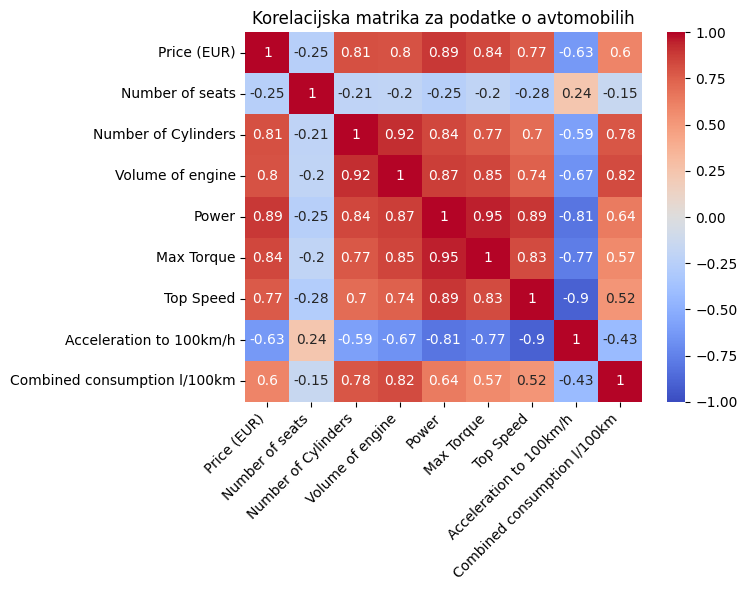

In [748]:
numeric_values = podatki_o_avtih.select_dtypes(include=np.number)
numeric_values =numeric_values.drop("Id", axis="columns")
matrix = numeric_values.corr()
sns.heatmap(matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(rotation=45, ha="right")
plt.title("Korelacijska matrika za podatke o avtomobilih")


Opazimo lahko močno povezavo med ceno in večino ostalih parametrov. Te povezave niso presenetljive, saj so bolj zmogljivi avotomobili navadno dražji. Izstopa velika korelacija med ceno in močjo ter med volumnom motorja in številom cilindrov. Tudi povezava med močjo in navorom je zelo velika, najvišja hitrost in pospešek pa sta negativno korelirana. 

Resnici na ljubo nam korelacijska matrika pove vse kar bi si želeli vedeti o povezavah med parametri, zato lahko tudi sami pogeldate vanj - morda vsebuje kakšne povezave, ki vas presenetijo, morda ne. 


## Raziskovanje podatkov

Lotimo se raziskovanja naših podatkov. Ali gorivo vpliva na moč? Kaj pa na navor in pospešek? Kako se cena kaže v hitrosti? Obstoj takšnih in drugačnih povezav med podatki bomo raziskali v spodnjem predelu.

Najprej si poglejmo enostavne povezave glede cene. Ali cena vpliva na:

 - hitrost
 - moč
 - število cilindrov
 - število sedežev

Pričakovano bi bilo, da bodo dražji avti hitrejši in močnejši. Prav tako bi lahko tudi sklepali, da bi se s ceno nekako večalo tudi število cilindrov, število sedežev pa bi se manjšalo, saj so dragi športniki ponavadi mišljeni za le eno do dve osebi. Odgovore na vsa to vprasanja bi lahko enostavno poisakali v zgornji korelacijski matriki, bolj nazorno odvisnost parametrov pa bomo dobili preko grafičnih prikazev. 

<Axes: xlabel='Price (EUR)', ylabel='Number of seats'>

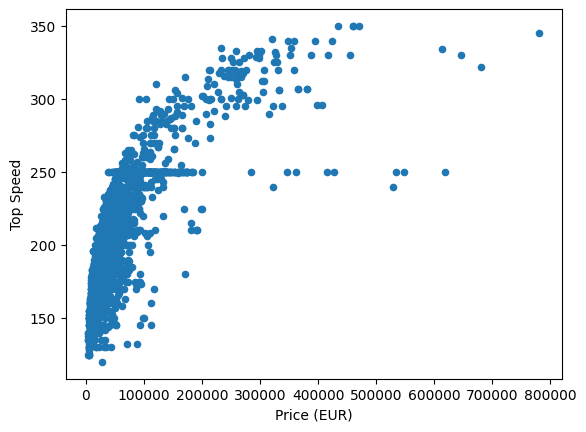

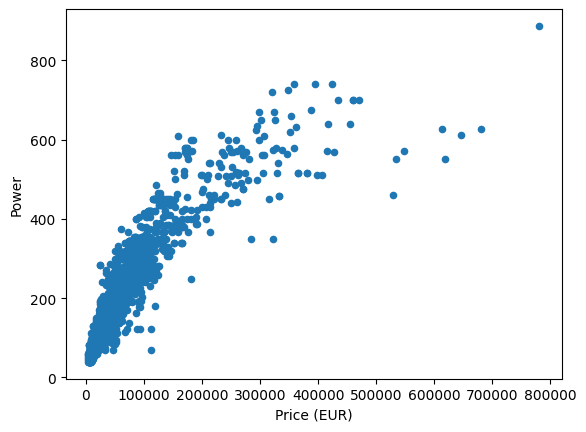

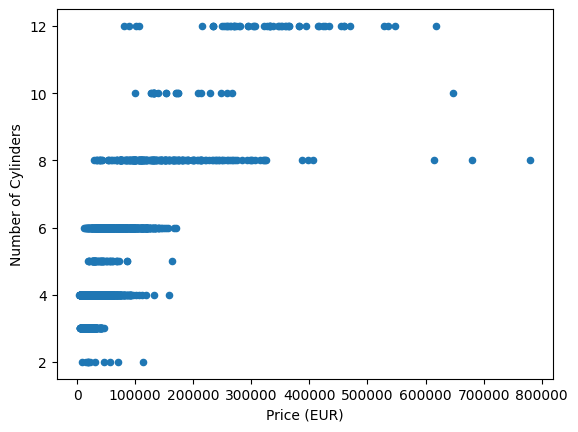

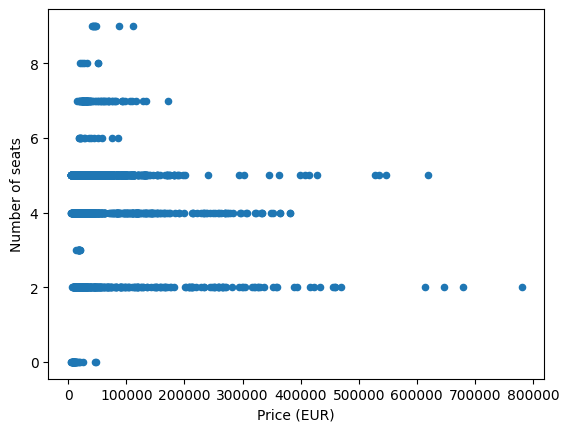

In [749]:
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Top Speed")
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Power")
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Number of Cylinders")
podatki_o_avtih.plot.scatter(x="Price (EUR)", y="Number of seats")

Opazimo, da med ceno in močjo ter med ceno in najvišjo hitrostjo obstaja povezava, za katero si zelo želimo da bi bila kvadratna. Poglejmo kako bi izgledala grafa, če bi narisali še najboljšo parabolo čez točke:

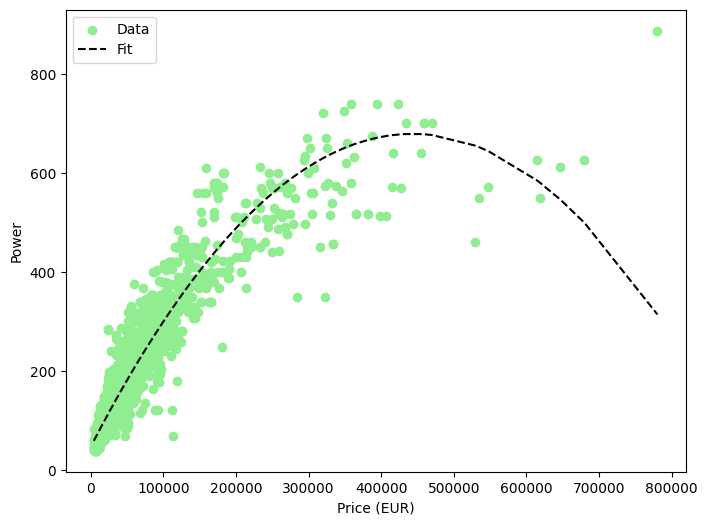

In [750]:
sorted_price = podatki_o_avtih.sort_values("Price (EUR)")
X = sorted_price["Price (EUR)"].to_numpy()
Y = sorted_price["Power"].to_numpy()
popt, pcov = curve_fit(sq, X, Y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X, Y, label="Data", c="lightgreen")
ax.plot(X, sq(X, *popt), label="Fit", color='black', ls="--")
bbox = dict(facecolor='white', edgecolor='black', linewidth=0.5)
ax.set_xlabel("Price (EUR)")
ax.set_ylabel("Power")
ax.legend()

plt.show()

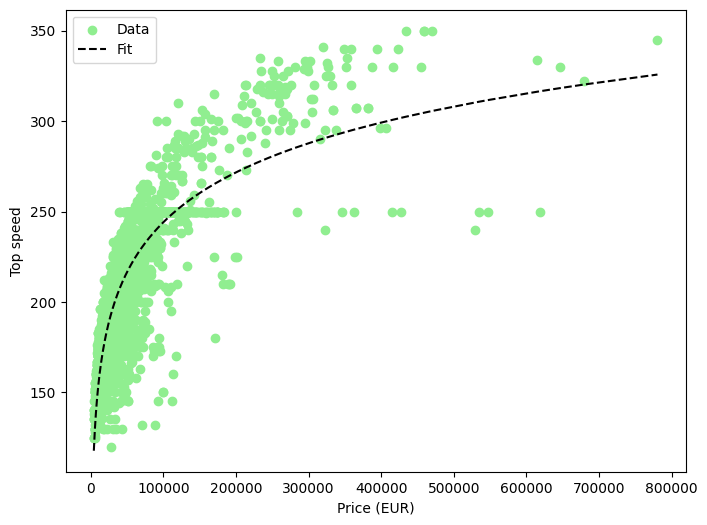

In [751]:
X = sorted_price["Price (EUR)"].to_numpy()
Y = sorted_price["Top Speed"].to_numpy()

popt, pcov = curve_fit(ln, X, Y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X, Y, label="Data", c="lightgreen")
ax.plot(X, ln(X, *popt), label="Fit", color='black', ls="--")
bbox = dict(facecolor='white', edgecolor='black', linewidth=0.5)
ax.set_xlabel("Price (EUR)")
ax.set_ylabel("Top speed")
ax.legend()

plt.show()

Kvadratna funkcija se lepo prilega prvi skupini točk, medtem ko je za razmerje med hitrostjo in ceno bolj ugodna logaritemska krivulja. Te rezultati nas tako navdušijo, da se odločimo povečati obseg naše raziskave! Po kratkem premisleku se odločimo, da si podrobneje pogledamo tudi vpliv prostornine in števila cilindrov na porabo avtomobila. Kmečka pamet bi nam namigovala, da bodo večji motorji porabili vec goriva. Ali nas morda kmečka pamet tokrat pusti na cedilu?

<Axes: xlabel='Number of Cylinders', ylabel='Combined consumption l/100km'>

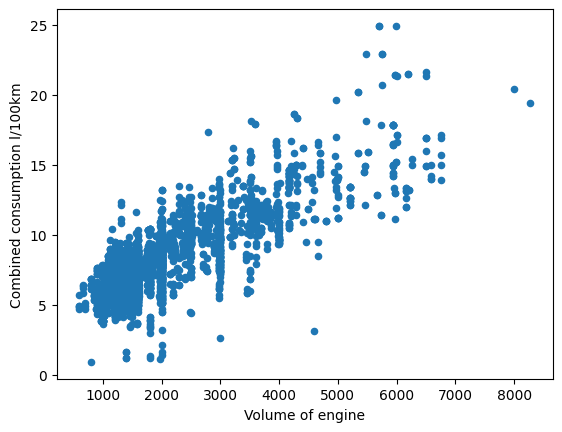

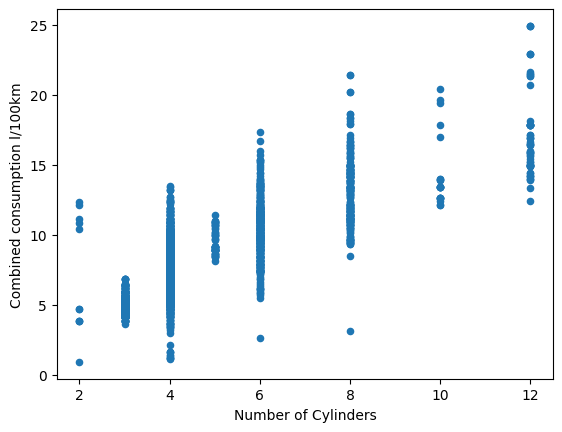

In [752]:
podatki_o_avtih.plot.scatter(x="Volume of engine", y="Combined consumption l/100km")
podatki_o_avtih.plot.scatter(x="Number of Cylinders", y="Combined consumption l/100km")

Tudi tukaj opazimo zanimve povezave: število cilindrov in volumen motorja gotovo vplivata na porabo avtomobila

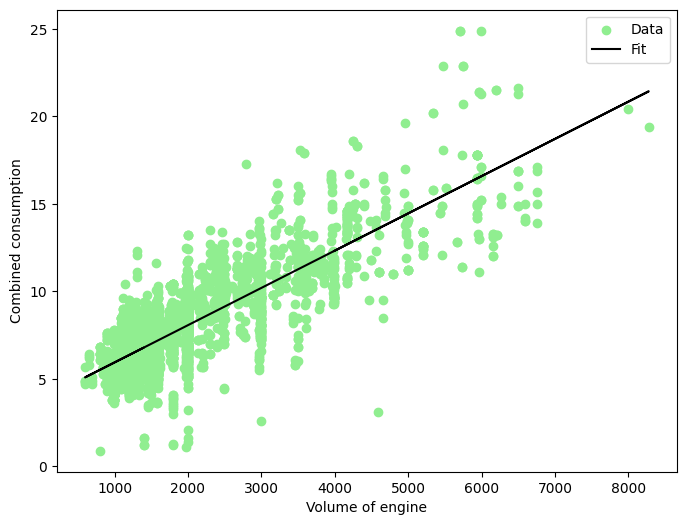

In [753]:
sorted_volume = podatki_o_avtih.sort_values("Volume of engine")
X = podatki_o_avtih["Volume of engine"]
Y = podatki_o_avtih["Combined consumption l/100km"]

popt, pcov = curve_fit(lin, X, Y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X, Y, label="Data", c="lightgreen")
ax.plot(X, lin(X, *popt), label="Fit", color='black', ls="-")
bbox = dict(facecolor='white', edgecolor='black', linewidth=0.5)
ax.set_xlabel("Volume of engine")
ax.set_ylabel("Combined consumption")
ax.legend()

plt.show()

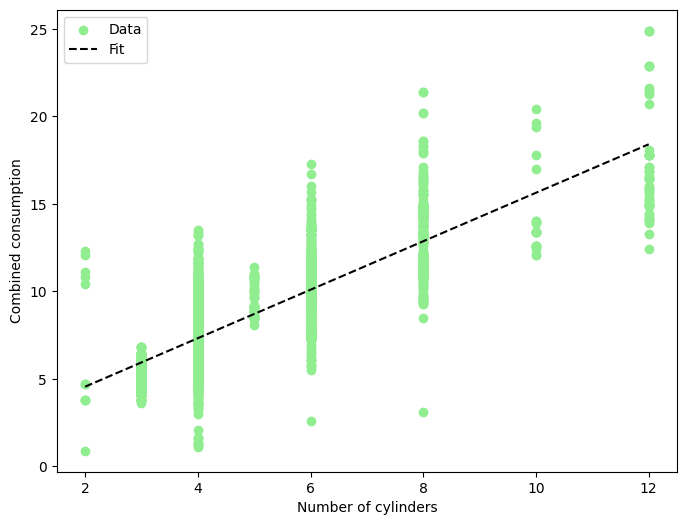

In [754]:
sorted_cylinders = podatki_o_avtih.sort_values("Number of Cylinders")
X = sorted_cylinders["Number of Cylinders"]
Y = sorted_cylinders["Combined consumption l/100km"]

popt, pcov = curve_fit(lin, X, Y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X, Y, label="Data", c="lightgreen")
ax.plot(X, lin(X, *popt), label="Fit", color='black', ls="--")
bbox = dict(facecolor='white', edgecolor='black', linewidth=0.5)
ax.set_xlabel("Number of cylinders")
ax.set_ylabel("Combined consumption")
ax.legend()

plt.show()

Ugotovili smo torej, da so povezave linearne.
Zanima nas tudi, kako bi lahko moč in navor vplivala na pospeške avtomobilov, zato si narišemo še dva grafa in si ju podrobno ogledamo:

<Axes: xlabel='Max Torque', ylabel='Acceleration to 100km/h'>

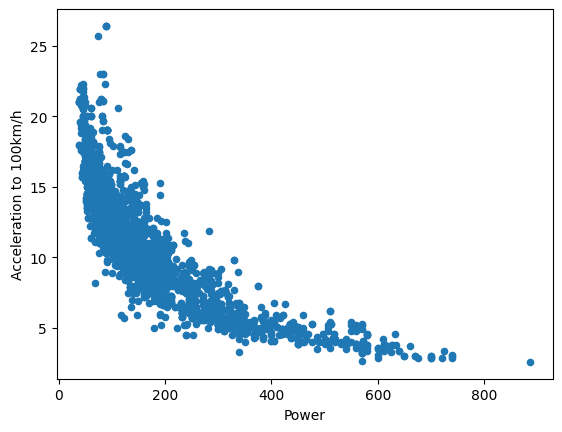

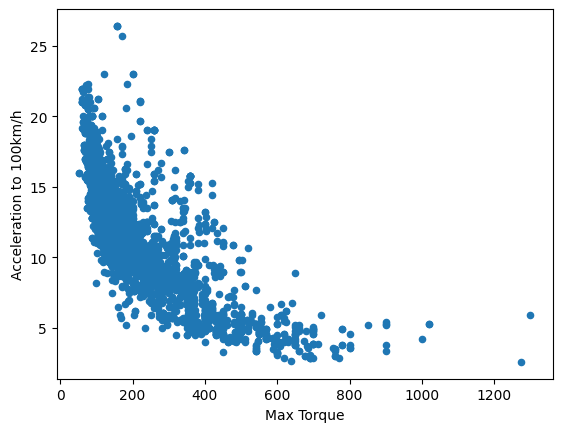

In [755]:
podatki_o_avtih.plot.scatter(x="Power", y="Acceleration to 100km/h")
podatki_o_avtih.plot.scatter(x="Max Torque", y="Acceleration to 100km/h")

Spet opazimo povezave, ki pa ne bodo ravno linearne, zato poskusimo s funkcijo oblike a/x + b

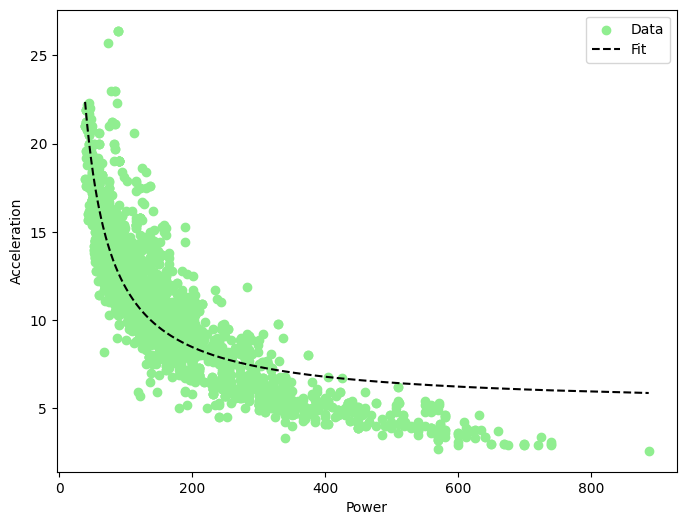

In [756]:
sorted_power = podatki_o_avtih.sort_values("Power")
X = sorted_power["Power"]
Y = sorted_power["Acceleration to 100km/h"]
popt, pcov = curve_fit(qu, X, Y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X, Y, label="Data", c="lightgreen")
ax.plot(X, qu(X, *popt), label="Fit", color='black', ls="--")
bbox = dict(facecolor='white', edgecolor='black', linewidth=0.5)
ax.set_xlabel("Power")
ax.set_ylabel("Acceleration")
ax.legend()

plt.show()

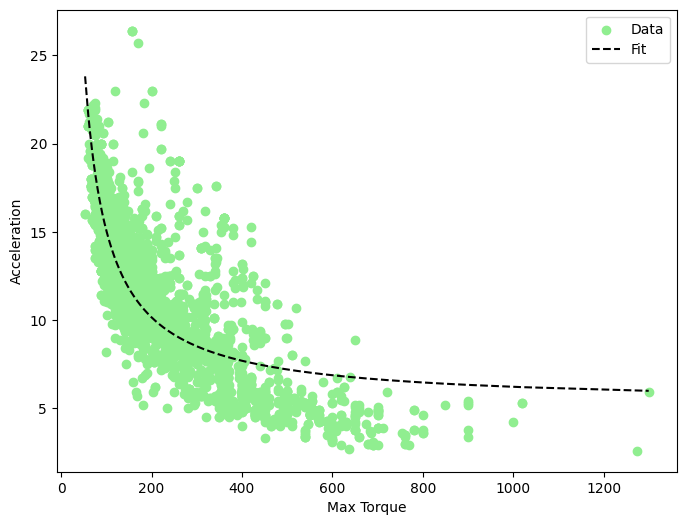

In [757]:
sorted_torque = podatki_o_avtih.sort_values("Max Torque")
X = sorted_torque["Max Torque"]
Y = sorted_torque["Acceleration to 100km/h"]
popt, pcov = curve_fit(qu, X, Y)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(X, Y, label="Data", c="lightgreen")
ax.plot(X, qu(X, *popt), label="Fit", color='black', ls="--")
bbox = dict(facecolor='white', edgecolor='black', linewidth=0.5)
ax.set_xlabel("Max Torque")
ax.set_ylabel("Acceleration")
ax.legend()

plt.show()

Povezava izgleda dobro, zato se nam veselje do dela spet dvigne na rekordne nivoje. Morda bi siver bilo bolje met kakšeno potenco več v imenovalcu, a nič zato.
Do zdaj smo ugotovili že veliko zanimivih, četudi ne presenetljivih povezav med podatki v naši tabeli. Kot pravi avtomobilski navdušenci pa nas seveda zanima tudi, kakšen avto ima najboljše razmerje med močjo in ceno. Pa poglejmo, kako bi to izgledalo:

In [758]:
temp = podatki_o_avtih.copy()
temp["Kvocient moci in cene"] = podatki_o_avtih["Power"]/podatki_o_avtih["Price (EUR)"]
podatki_o_avtih.iloc[[temp["Kvocient moci in cene"].idxmax()]]
moc_in_cena = podatki_o_avtih.iloc[[temp["Kvocient moci in cene"].idxmax()]].iloc[0]["Id"]
print(moc_in_cena)


26395


Ampak zlomka, saj ne vemo sploh kateri avto to je. Edini podatek, ki ga imamo je njegov Id, to pa ni koristno za nakupovanje. Če bi to storili, bi nam lepo odprli vrata na poti ven. Vselej pa imamo njegov Id, kar nam omogoča, da povežemo podatke z njegovo spletno stranjo. Pa storimo točno to. Najprej si poglejmo kako sploh izgleda naša pomožna datoteka, nato pa povežimo dobljen Id z Url naslovom spletne strani avtomobila:

In [759]:
meta = pd.read_csv("auxillary.csv")
meta.head()

,Id,Name,Url
0,51436,volkswagen-new-beetle-cabrio-1-4-trendline,https://www.cars-data.com/en/volkswagen-new-be...
1,51447,volkswagen-passat-1-3-c,https://www.cars-data.com/en/volkswagen-passat...
2,51467,volkswagen-passat-1300,https://www.cars-data.com/en/volkswagen-passat...
3,51476,volkswagen-passat-1-3-c,https://www.cars-data.com/en/volkswagen-passat...
4,51482,volkswagen-passat-1-3-c,https://www.cars-data.com/en/volkswagen-passat...


Očitno naša pomožna datoteka vsebuje id, ime avtomobila in njegovo spletno stran. Ker je ime nemogoče pravilno izluščiti, bo najbolje, da poiščemo spletno stran avtomobila.

In [760]:
meta.loc[meta["Id"] == moc_in_cena].iloc[0]["Url"]

'https://www.cars-data.com/en/mitsubishi-colt-cz5-1-1-incharge-specs/26395/tech'

Krasno. Poskali smo avto, ki nam da največ konjskih moči glede na njegovo ceno. Sedaj se lahko polni samozavesti odpravimo po nakupih! Zanimivo je, da je to cenejši avto z malo moči, ne pa malenkost dražji avto z več moči. 
Poglejmo si še nekatere patološke primere. Konec koncev smo avtomobilski navdešenci, zato nas zainmajo le najhitrejši in najmočnejsi, ti pa so na žalost tudi navadno najdražji. Te dobimo na sledeč način, enako kot zgoraj pa pridobimo tudi url, da se bomo lahko v primeru velike sreče na lotu, odpravili kupit tudi te. Poglejmo si najprej, kateri avto je najmočnejši. 

In [761]:
print(podatki_o_avtih.loc[podatki_o_avtih["Power"].idxmax()])

Id                                             67803
Price (EUR)                                   780450
Transmission                       7 speed automatic
Number of Gears                                    7
Body Type                       2-doors, convertible
Number of seats                                  2.0
Drive wheel                               front+rear
Fuel Type                                   gasoline
Number of Cylinders                              8.0
Volume of engine                              4593.0
Power                                          887.0
Max Torque                                    1275.0
Top Speed                                      345.0
Acceleration to 100km/h                          2.6
Combined consumption l/100km                     3.1
Name: 1448, dtype: object


In [762]:
print(podatki_o_avtih.loc[podatki_o_avtih["Power"].idxmax()]["Id"])
meta.loc[meta["Id"] == podatki_o_avtih.loc[podatki_o_avtih["Power"].idxmax()]["Id"]]

67803


,Id,Name,Url
1448,67803,porsche-918-spyder,https://www.cars-data.com/en/porsche-918-spyde...


Vidimo, da je najmočnejši avto Porsche 918 Spyder, en izmed najbolj prepoznanih superšportnikov na svetu. 
Enak postopek lahko ponovimo tudi za najhitrejši in najdražji avto. Najprej si poglejmo najhitrejšega:

In [763]:
print(podatki_o_avtih.loc[podatki_o_avtih["Acceleration to 100km/h"].idxmin()])
print(podatki_o_avtih.loc[podatki_o_avtih["Acceleration to 100km/h"].idxmin()]["Id"])
meta.loc[meta["Id"] == podatki_o_avtih.loc[podatki_o_avtih["Acceleration to 100km/h"].idxmin()]["Id"]]

Id                                             67803
Price (EUR)                                   780450
Transmission                       7 speed automatic
Number of Gears                                    7
Body Type                       2-doors, convertible
Number of seats                                  2.0
Drive wheel                               front+rear
Fuel Type                                   gasoline
Number of Cylinders                              8.0
Volume of engine                              4593.0
Power                                          887.0
Max Torque                                    1275.0
Top Speed                                      345.0
Acceleration to 100km/h                          2.6
Combined consumption l/100km                     3.1
Name: 1448, dtype: object
67803


,Id,Name,Url
1448,67803,porsche-918-spyder,https://www.cars-data.com/en/porsche-918-spyde...


Porsche 918 ima tudi naziv najhitrejšega avtomobila, kar niti ne preseneča, saj doseže 100km/h v okoli 2.6s. Zanimivo bi bilo pogledati še najdražjega:

In [764]:
print(podatki_o_avtih.loc[podatki_o_avtih["Price (EUR)"].idxmax()])
print(podatki_o_avtih.loc[podatki_o_avtih["Price (EUR)"].idxmax()]["Id"])
meta.loc[meta["Id"] == podatki_o_avtih.loc[podatki_o_avtih["Price (EUR)"].idxmax()]["Id"]]

Id                                             67803
Price (EUR)                                   780450
Transmission                       7 speed automatic
Number of Gears                                    7
Body Type                       2-doors, convertible
Number of seats                                  2.0
Drive wheel                               front+rear
Fuel Type                                   gasoline
Number of Cylinders                              8.0
Volume of engine                              4593.0
Power                                          887.0
Max Torque                                    1275.0
Top Speed                                      345.0
Acceleration to 100km/h                          2.6
Combined consumption l/100km                     3.1
Name: 1448, dtype: object
67803


,Id,Name,Url
1448,67803,porsche-918-spyder,https://www.cars-data.com/en/porsche-918-spyde...


Glede na naše prejšnje ugotovitve, da moč narašča s ceno, ne smemo biti presenečeni, da je smo spet zagledali starega znanca, 918 Spyder-ja. Očitno obstaja dober razlog, zakaj je tako priljubljen in tako poseben. Vredno je omeniti, da je baza podatkov nepopolna in malenkost zastarela. Res, obstajajo močnejsi in hitrejši avtomobili danes, zato je potrebno pri interpretaciji imeti v mislih, da morda manjkajo kakšne novejše izvedbe. 

Naša pomožna tabela nam omogoča še nekaj. Ker imena avtomobilov ne moremo z gotovostjo izluščiti, težko kaj povemo o njih, lahko pa pogledamo prvo besedo pri imenu, ki je znamka avtomobila, in s tem povemo nekaj o znamkah. 

In [765]:
meta["Make"] = meta["Name"].str.split("-").str[0]
meta["Make"]

0       volkswagen
1       volkswagen
2       volkswagen
3       volkswagen
4       volkswagen
           ...    
4824          audi
4825          audi
4826          audi
4827          audi
4828          audi
Name: Make, Length: 4829, dtype: object

Zdaj ko imamo znamke, si lahko pogledamo, katere so naredile največ in katere najmanj modelov.

In [766]:
meta["Make"].value_counts()

Make
audi           382
toyota         273
renault        222
ford           221
mercedes       221
              ... 
josse            1
think            1
autobianchi      1
bugatti          1
pgo              1
Name: count, Length: 94, dtype: int64

Iz zgornje tabele lahko razberemo, da Audi vodi s 382 modeli, na drugem mestu pa je Toyota. A pozor! Spet podatki gotovo niso točni: Bugatti je izdal več kot le en avtomobil, zato se na točnost teh podatkov težko zanesemo. Kljub temu, nam lahko dajo vsaj okvirno idejo, kako si proizvajalci sledijo. 

Za konec tega poglevja si oglejmo tudi povezavo med porabo goriva in vrsto goriva. Ali res drži, da dizlski motorji porabijo manj od bencinskih? 

Aerage for gasoline: 8.23
Average for diesel: 7.31


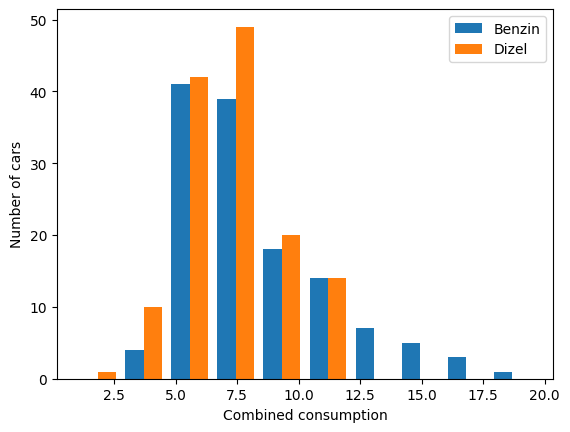

In [767]:
bencin = podatki_o_avtih["Combined consumption l/100km"].where(podatki_o_avtih["Fuel Type"] == "gasoline")
dizel = podatki_o_avtih["Combined consumption l/100km"].where(podatki_o_avtih["Fuel Type"] == "diesel")
dizel = dizel.dropna()
bencin = bencin.sample(n=len(dizel))
plt.hist([bencin, dizel], label=["Benzin", "Dizel"])
plt.legend(loc="upper right")
plt.ylabel("Number of cars")
plt.xlabel("Combined consumption")
print(f"Aerage for gasoline: {round(bencin.mean(), 2)}")
print(f"Average for diesel: {round(dizel.mean(), 2)}")

Opazimo lahko, da je povprečna poraba dizelskih motorjev malenkost nižja od bencinskih motorjev, kar se sklada z našimi pričakovanji.

Seveda pa lahko te podatke tudi praktično uporabimo za pomoč pri nakupu. Lahko se postavimo v situacijo, kjer iščemo nov avto nas zanima, kateri avtomobili ustrezajo našim kriterijem. Recimo da smo se z družino odločili za nakup novega avtomovila. Najbolj pomembno nam je, da ima avto 5 sedežev, saj je potebno imeti dovolj prostora. Poleg tega si želimo dizelski motor, ki bo poganjal vsa štiri kolesa. Ker smo avtomobilski navdušenci, si želimo vsaj 300hp, glede menjalnika pa nismo zbirčni, saj so nam vse možnosti všeč. Ker smo finančno odgovorni, si seveda želimo videti cenejše možnosti najprej.

In [768]:
nakup = podatki_o_avtih.where((podatki_o_avtih["Number of seats"] == 5) & 
                              (podatki_o_avtih["Fuel Type"] == "diesel") & 
                              (podatki_o_avtih["Drive wheel"] == "front+rear") &
                              (podatki_o_avtih["Power"] >= 300)
                              ).sort_values("Price (EUR)", ascending=True)
nakup = nakup.dropna()
nakup

,Id,Price (EUR),Transmission,Number of Gears,Body Type,Number of seats,Drive wheel,Fuel Type,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
3803,93177.0,93520.0,8 speed automatic,8,"4-doors, sedan",5.0,front+rear,diesel,6.0,2967.0,347.0,700.0,250.0,4.8,6.2
3804,93211.0,95820.0,8 speed automatic,8,"5-doors, station wagon",5.0,front+rear,diesel,6.0,2967.0,347.0,700.0,250.0,4.9,6.3


Hoho! Imamo na voljo dva avtomobila, ki ustrezata našim zahtevam. Zdi se mi, da bi bili s katerokoli izbiro vsi družinski člani zelo zadovoljni. Osem stopenjsi avtomatski menjlanik bo zagotavljal, da se na dolgih vožnjah ne utrudimo, tri litersi pogonski agregat pa poskrbi, da lahko vedno pridemo točno, četudi smo se odpravili minuto pozno. Podobno kot zgoraj bi lahko preko Id-a naših možnosti prišli tudi do imena oz spletne strani avtomobila. Na podoben način bi seveda lahko za marsikoga prikazali vse možne avtomobile, ki so zanj ustrezni.

## Vizualizacija podatkov nekoliko drugače

Običajno, ko delamo s podatki, je koristno, da si jih narišemo. S tem pridobimo boljše razumevanje o povezavi med njimi in se lažje odločimo o nadalnjih korakih. Hkrati tudi hitro opazimo, kateri elementi so blizu in kateri ne. Na primer, pri merjenju raztega vzmeti v odvisnosti od sile, ki razteguje vzmet, lahko že samo z risanjem izmenjenih točk hitro veliko povemo o medsebojni obvistnosti dveh količin, o bližini dveh meritev pa se lahko hitro prepričamo. Ampak, naši podatki niso eno- ali dvo-dimenzionalni, toda nekoliko več. Kljub temu, bi radi podatke predstavili v dveh ali treh dimenzijah, da bi s tem bolje razumeli, kaj točno se dogaja. Še dobro da nismo prvi, ki se srečamo s takim problemom, saj imamo na voljo nekaj rešitev. Konkretno bi predstavil zajete podatke z uporabo t-SNE in PCA, ki sta dve metodi za zmanjševanje dimenzionalnosti podatkov, ki skušata ohraniti čimveč pomembnih informacij glede njih. Delovanje teh algoritmov je zapleteno (resnici na ljubo ne morem trditi da jih razumem), za radovedne bralce pa se nekaj dodatnih informacij nahaja [tukaj za t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) in [tukaj za PCA](https://www.ibm.com/topics/principal-component-analysis). Seveda je spletnih virov veliko, radovednost pa zelo koristna lastnost. 

O prednostih, slabostih, delovanju in lastnostih obeh metod ne bi razglabljal, saj je to naloga ljudi, ki algoritme dobro razumejo. Bi pa omenil, da algoritmi deluejo le za numerične podatke. Pri resni analizi se je najprej potrebno vprašati, ali je tak prikaz sploh ustrezen, kaj izgubimo in kaj pridobimo ter kaj želimo izvedeti. Ne glede na odgovore na prejšnja vprasanja pa lahko podatke vedno vizualiziramo, saj nas to ničesar ne stane, lahko pa kaj pridobimo iz tega. Zato si dajmo pogledati, kako bi izgledali naši podatki v nižjih dimenzijah.

### Vizualizacija s t-SNE


In [769]:
X = podatki_o_avtih.select_dtypes(include=np.number)
X = X.dropna()
X = X.drop("Id", axis="columns")
X.head()

,Price (EUR),Number of seats,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
0,27590,4.0,4.0,1390.0,75.0,126.0,160.0,15.6,7.1
1,10389,5.0,4.0,1272.0,55.0,88.0,148.0,18.0,8.6
2,9473,5.0,4.0,1272.0,55.0,88.0,148.0,18.0,8.6
3,10754,5.0,4.0,1272.0,55.0,88.0,148.0,18.0,8.6
4,11907,5.0,4.0,1297.0,60.0,100.0,152.0,16.8,7.4


Text(0.5, 1.0, 't-SNE transformed dataframe')

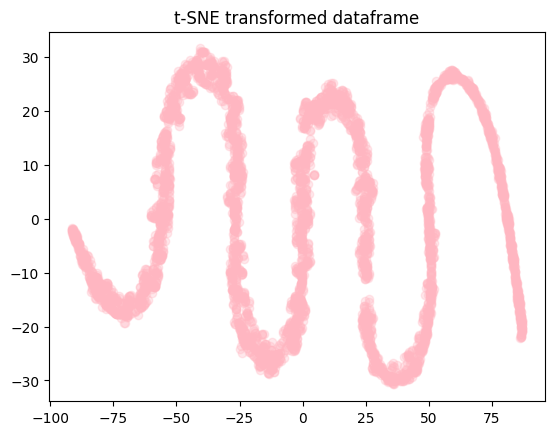

In [714]:
tsne = TSNE(n_components=2, perplexity=60, learning_rate=200)
new_X = tsne.fit_transform(X)
new_X = pd.DataFrame(new_X, columns=["TSNE1", "TSNE2"])

plt.scatter(new_X["TSNE1"], new_X["TSNE2"], alpha=0.3, c="lightpink")
plt.title("t-SNE transformed dataframe")


Tukaj se zelo splača igrati tudi z barvanjem točk, z vrednostjo `perplexity` in ostalimi nastavitvami, da dobimo, kar si najbolj želimo. Pomembno je omeniti tudi, da osi nimajo nobenega resnega pomena, za razliko od PCA, kjer so osi grafa zelo pomembne. Poglejmo si še graf, ki ga dobimo, ko uporabimo PCA

### Vizualizacija s PCA

[9.9988307e-01 1.1510928e-04]


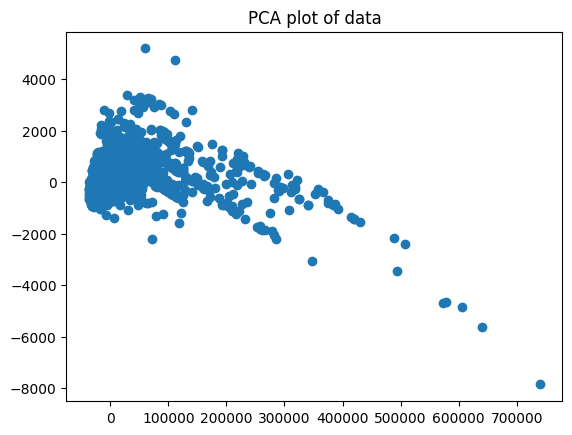

In [770]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_df, columns=["PC1", "PC2"])

plt.scatter(pca_df["PC1"], pca_df["PC2"])
plt.title("PCA plot of data")

print(pca.explained_variance_ratio_)

Zanimiv rezultat je vrednost variance PC1, saj nakazuje da je skoraj vsa varianca povezana s to smerjo. Zanima nas seveda tudi, katera smer sploh je najpomembnejsa, zato si poglejmo, kako je sestavljena ta smer:

In [771]:
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=["PC1", "PC2"])
pca_components

,Price (EUR),Number of seats,Number of Cylinders,Volume of engine,Power,Max Torque,Top Speed,Acceleration to 100km/h,Combined consumption l/100km
PC1,0.999897,-0.000004,0.000021,0.014140,0.001687,0.001982,0.000501,-0.000039,0.000027
PC2,-0.014313,0.000004,0.001089,0.996324,0.049107,0.067337,0.013326,-0.001698,0.002439


Vidimo, da so uteži zelo zanimivo razporejene, daleč največjo vlogo pa igra cena. 

Seveda je moje znanje ne teh področjih zelo pomanjklivo, ampak sem zelo navdušen nad idejo, da lahko visokodimenzionalne podatke vseeno prikažemo v 2D ravninah z relativno malo izgube. Zadnje poglavje je zato bolj zanimivot kot pa resen del naloge, saj mi manjka precej znanja za globoko razumevanje algoritmov. 

## Zaključek

V podatkovni analizi smo pridobili kar nekaj precej koristnih podatkov. Povprečne vrednosti parametrov, najhitrejši in najmočnejsi avto. Ugovotvili smo tudi, kateri avtomobil nam da največ moči glede na njegovo ceno in odkrili nekaj (pričakovanih) korelacij med npr. močjo in najvišjo hitrostjo. Ostale korelacije so zelo hitro opazne iz korelacijske matrike, kjer hitro razberemo povezanost dveh parametrov. Nekaj teh povezav smo si pogledali tudi od blizu in ugotovili, da so nekatere linearene, druge kvadratne, nekatere pa najbolj spominjajo na logaritemske povezave, česar gotovo nisem pričakoval. Pogledali smo si tudi prikaz podatkov v nižjih dimenzijah kot zanimivost in veliko informacij pridobili s pomocjo grafov npr. vrste goriva in pogonska kolesa. 

Razglasimo lahko tudi pravilnost oz. napačnost začetnih hipotez:

 - povprečna cena je bila 40554.87 EUR, zato smo bili (ZELO) blizu s svojo napovedjo
 - daleč največ je bilo motorjev s štirimi cilindri, zato smo tudi tukaj pravilno napovedali
 - videli smo, da sta hitrost in cena povezana tako da so dražji avtomobili hitrejši
 - najbolj pogosta prostornina je res bila manjša ali enaka 2.0L, zato smo pravilno napovedali
 - izkazalo se je, da je najbolj pogosto število prestav pet, ne pa šest, kot smo napovedali
 - večina avtomovilov je res imela prednji pogon, zato smo tudi tukaj pravilno napovedali

Skupaj smo imela pet od šestih hipotez pravilnih. Potrebno je omenitit, da so podatki v bazi vključeni le do nekega leta, zato je možno, da je število menjalnikov s šestimi prestavami večeje, število menjalnikov s petimi pa se verjetno ne bi bistveno spremenilo, saj imajo modrenejši menjalniki običajno več prestav. 

Zelo presenetljiv je bil rezultat deleža bencinskih motorjev, saj sem pričakoval, da bo delež približno enak. 

Pokazali smo tudi, da je Porsche 918 Spyder najboljši športnik, če si seveda lahko privoščimo avto vreden skoraj 800000 EUR. To je sicer prodajna cena, ko je bil avto v redni prodaji. Omejen samo na 918 avtomobilov in odstranjen iz proizvodnje leta 2015, nas bo danes tak rabljen avtomobil stal tudi preko 2 milijona evrov. Za radovedneže si lahko več o tem legendarnem avtomobilu preberete [tukaj](https://en.wikipedia.org/wiki/Porsche_918_Spyder), za posnetek pa lahko kliknite [tukaj](https://www.youtube.com/watch?v=N_znJtmBWPE), ima pa tudi lastno epizodo v televizijski seriji [Top Gear](https://www.youtube.com/watch?v=nSqzp3kdAm4). Močno priporočam ogled in raziskovanje o tem avtomobilu. Gre za res nekaj posebnega. 

Analiza seveda ni popolna, ponekod smo se srečali z manjkajočimi podatki, gotovo pa bi lahko bolj podrobno analizirali se kakšno povezavo. Poleg tega obstaja še mnogo drugih podatkov, ki določajo avtomobil, zato je možnosti za nova odkritja še zelo veliko.